In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import json

In [20]:
all_info = []
with open("data/CDF of Idle Latency.json", "r") as f:
    data = json.load(f)
for tech_data in data.get("aggregations", '').get("terms", '').get("buckets", ''):
    for pc_info in tech_data.get("cdf", '').get("values", ''):
        all_info.append([tech_data.get("key", ""), pc_info.get("key", ""), pc_info.get("value", "")])

df = pd.DataFrame(all_info, columns=["technology", "percentiles", "latency"])


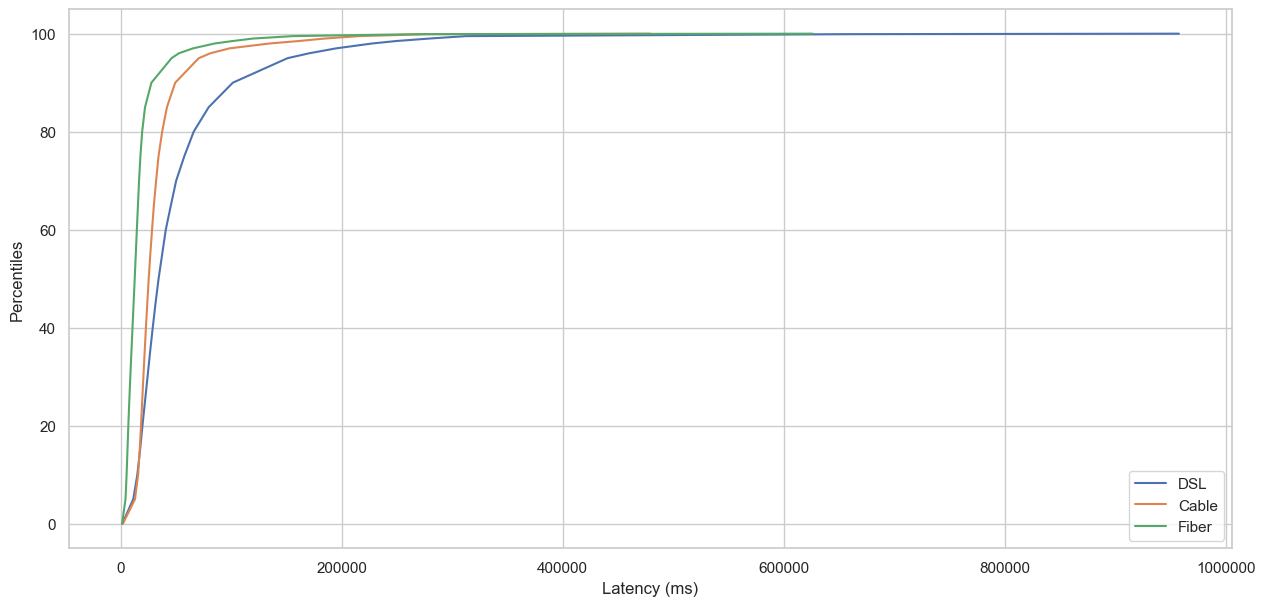

In [26]:
# General plot again
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")

for tech in ["DSL", "Cable", "Fiber"]:
    temp_df = df[df["technology"] == tech]
    x_num = temp_df["latency"]
    y = temp_df['percentiles']
    idx = np.isfinite(y) & np.isfinite(x_num)
    x_fit = np.linspace(x_num.min(), x_num.max())

    # Calculate fit line
    # trend = np.polyfit(x_num[idx], y[idx], 2)
    # fit = np.poly1d(trend)


    # plt.plot(dates.num2date(x_fit), fit(x_fit), "r--", label=f"{tech} Trend")
    plt.plot(x_num, y, label=f"{tech}")

plt.ylabel('Percentiles')
plt.xlabel('Latency (ms)')
plt.ticklabel_format(style='plain') # prevent scientific notation
# plt.title(f"Median of Idle Latency Measurements Per Month by Technology (2011 – 2023)")
plt.legend(loc="best")
# And show
plt.show()